# House Prices - Exploratory Data Analysis
Understanding data and what we already have is the most important step in any data science project. So, let's see what we have.

![Abstract houses](https://storage.googleapis.com/kaggle-media/competitions/House%20Prices/kaggle_5407_media_housesbanner.png)

<br>

# Step 0: Set the fire
- Import the libraries
- Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

trainData = pd.read_csv('data/train.csv')
testData = pd.read_csv('data/test.csv')

# Step 1: What's in the data?
- Basic information about the data
- Discover missing values

### 1.1 Data info

In [2]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p>Wow, we've about 79 feature!<p>
<p style="color: #fc0000;">And, I don't have enough time to discover them one by one</p>
<p> So, I'll do some research and pick some features based on the research findings</p>
</div>

### 1.2 Missing values

In [3]:
# my fav missing values functions
def get_missing_value_counts(data_frame):
    missing_counts = data_frame.isnull().sum()
    missing_columns = missing_counts[missing_counts > 0]
    return missing_columns

missing_values_table = get_missing_value_counts(trainData)
print(missing_values_table)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
    <p>I think that removing Alley, PoolQC, Fence, and MiscFeature is likely to be the good choice</p>
    <p style="color: #fc0000;">But, I don't know what I should do with MasVnrType and FireplaceQu</p>
</div>

# Step 2: Explore some features
I going to do bivariate analysis between the sale price and the following features:
1. Building types
2. zone
3. street
4. Property Age
5. Living Area

# 2.1 Building types

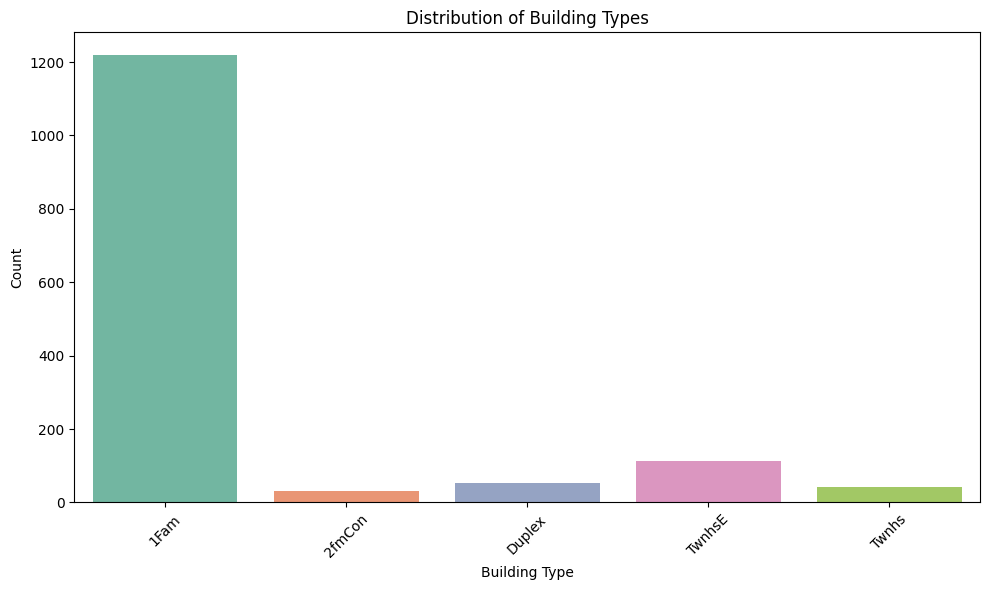

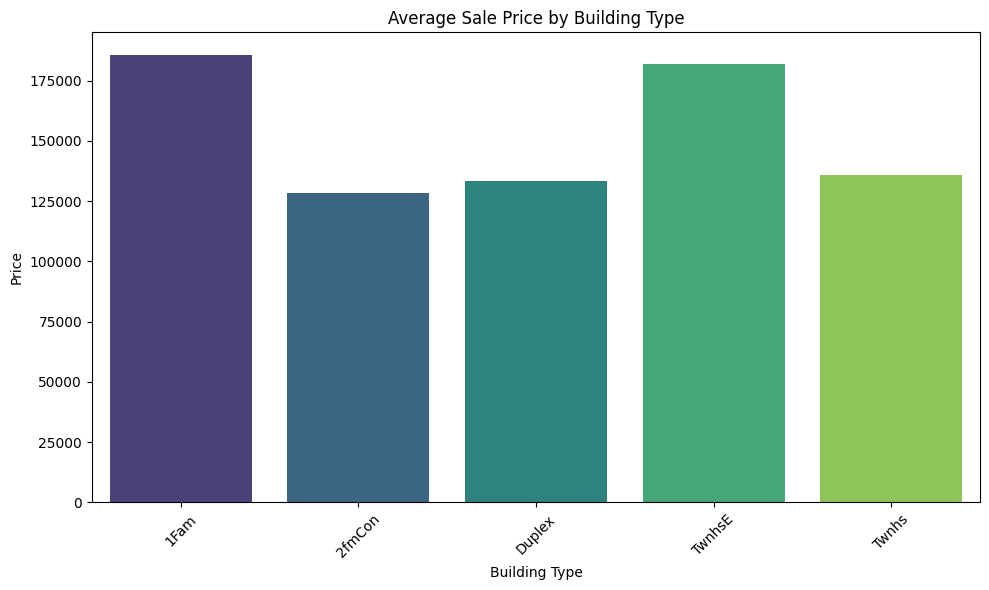

In [4]:
# Distribution of dwelling types
plt.figure(figsize=(10, 6))
sns.countplot(data=trainData, x='BldgType', palette='Set2')
plt.title('Distribution of Building Types')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average Sale Price by Building Type
plt.figure(figsize=(10, 6))
sns.barplot(data=trainData, x='BldgType', y='SalePrice', palette='viridis', errorbar=None)
plt.title('Average Sale Price by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
    <p>There are a lot of 1Fam houses and their price is higher than any other building type</p>
    <p style="color: #fc0000;">Also, there are less TwnhsE but it still have a high price</p>
</div>

# 2.2 Zoning

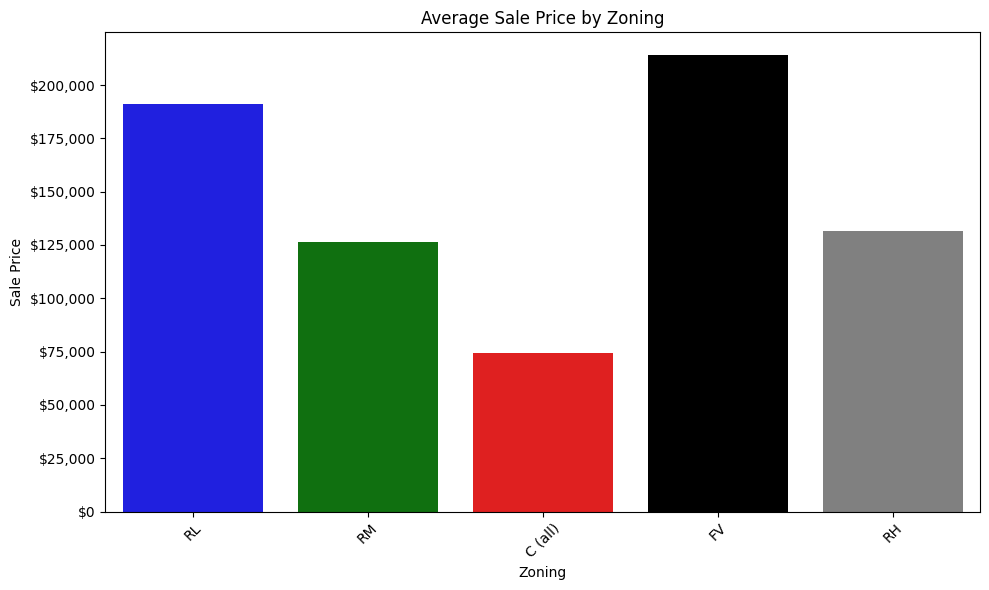

In [5]:
# 2. Zoning impact on sale price
plt.figure(figsize=(10, 6))
sns.barplot(data=trainData, x='MSZoning', y='SalePrice', errorbar=None, palette=['blue', 'green', 'red', 'black', 'gray'])
plt.title('Average Sale Price by Zoning')
plt.xlabel('Zoning')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)  # Format y-axis ticks as currency
plt.tight_layout()
plt.show()

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
    <p>You can find the most price in "FV" and "RL while "C" is out of the game</p>
</div>

# 2.3 Street

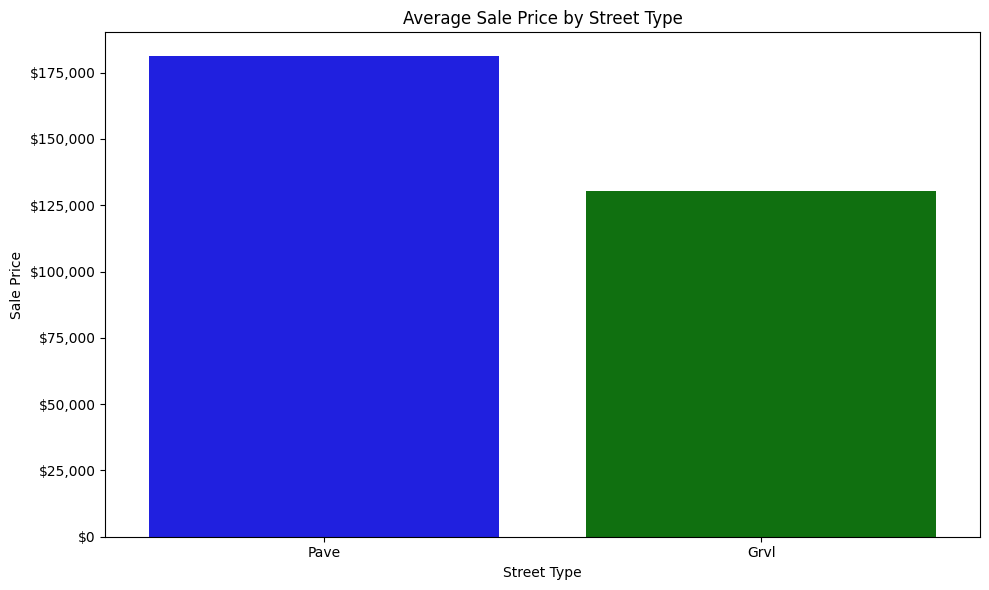

In [6]:
# Street Prices
street_prices = trainData.groupby('Street')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(data=trainData, x='Street', y='SalePrice', errorbar=None, palette=['blue', 'green'])
plt.title('Average Sale Price by Street Type')
plt.xlabel('Street Type')
plt.ylabel('Sale Price')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)  # Format y-axis ticks as currency
plt.tight_layout()
plt.show()

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
    <p>Houses in Pave have much higher price</p>
</div>

# 2.4 Property Age

Correlation between Property Age and Sale Price: -0.5233504175468159


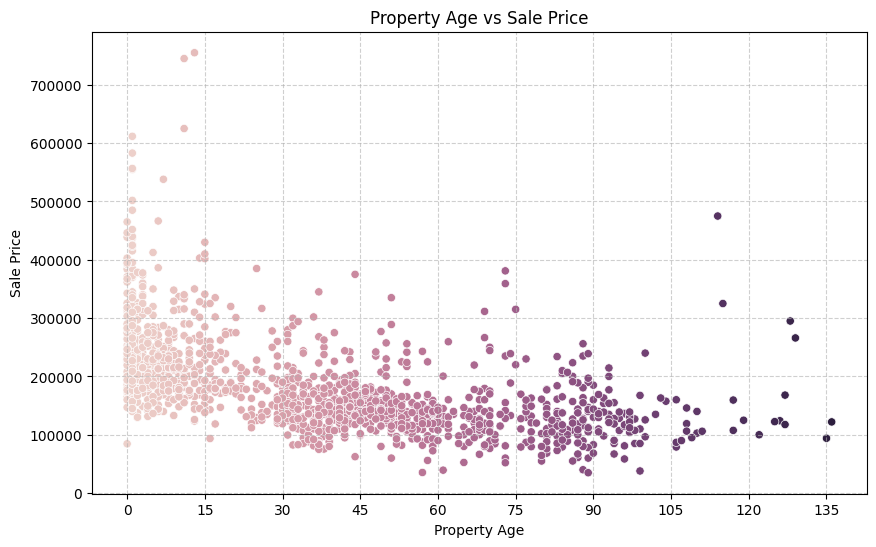

In [7]:
# Calculate Property Age
trainData['PropertyAge'] = trainData['YrSold'] - trainData['YearBuilt']

# Calculate Correlation between Property Age and Sale Price
age_price_corr = trainData['PropertyAge'].corr(trainData['SalePrice'])
print(f'Correlation between Property Age and Sale Price: {age_price_corr}')

# Create a scatter plot to visualize the relationship between Property Age and Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=trainData, x='PropertyAge', y='SalePrice', hue='PropertyAge', legend=False)
plt.title('Property Age vs Sale Price')
plt.xlabel('Property Age')
plt.ylabel('Sale Price')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensure integer values on x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
    <p>It seems like the prices are nearly the same with some high prices for the houses that are less than 15 years old</p>
</div>

# 2.5 Living Area

Correlation between Living Area (above grade) and Sale Price: 0.7086244776126521


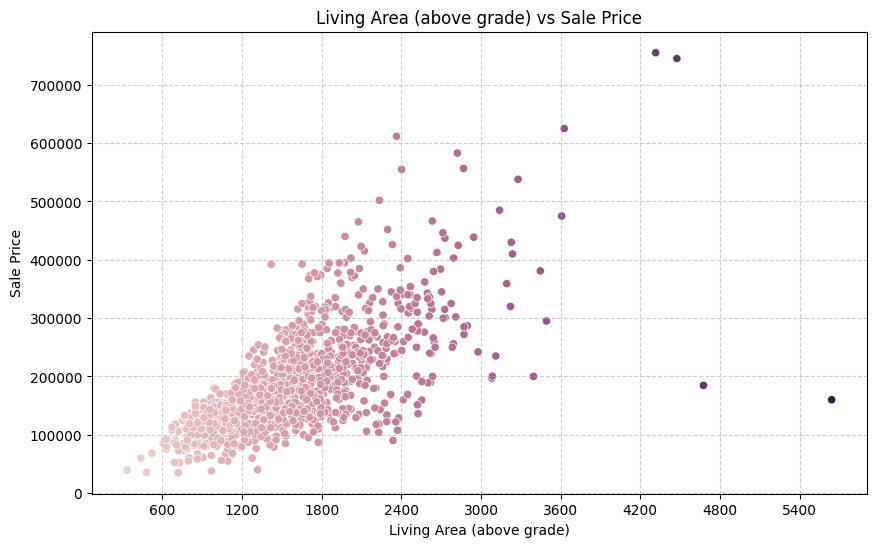

In [8]:
living_area_price_corr = trainData['GrLivArea'].corr(trainData['SalePrice'])
print(f'Correlation between Living Area (above grade) and Sale Price: {living_area_price_corr}')

# Create a scatter plot to visualize the relationship between Living Area and Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=trainData, x='GrLivArea', y='SalePrice', hue='GrLivArea', legend=False)
plt.title('Living Area (above grade) vs Sale Price')
plt.xlabel('Living Area (above grade)')
plt.ylabel('Sale Price')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensure integer values on x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
    <p>Now this is my fav relation</p>
</div>

That's all for the exploratory data analysis. In the next notebook, I'll build the house prices prediction model.